In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv2

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import imutils

from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

In [57]:
train_dir = './images_otherview/train'
train_dir_process = './images_otherview/train/processed'
train_dir_pos = os.path.join(train_dir, 'positive')
train_dir_neg = os.path.join(train_dir, 'negative')
test_dir = './images_otherview/test'
test_dir_process = './images_otherview/test/processed'
test_dir_pos = os.path.join(test_dir, 'positive')
test_dir_neg = os.path.join(test_dir, 'negative')
# valid_dir = './images_otherview/valid'
# valid_dir_process = './images_otherview/valid/processed'
# valid_dir_pos = os.path.join(valid_dir, 'positive')
# valid_dir_neg = os.path.join(valid_dir, 'negative')
#skipping valid for now due to positive data sample set

train_pos_process = os.path.join(train_dir_process, 'positive')
train_neg_process = os.path.join(train_dir_process, 'negative')
# valid_pos_process = os.path.join(valid_dir_process, 'positive')
# valid_neg_process = os.path.join(valid_dir_process, 'negative')
test_pos_process = os.path.join(test_dir_process, 'positive')
test_neg_process = os.path.join(test_dir_process, 'negative')

In [58]:
num_pos_train = len(os.listdir(train_dir_pos))
num_neg_train = len(os.listdir(train_dir_neg))
num_pos_test = len(os.listdir(test_dir_pos))
num_neg_test = len(os.listdir(test_dir_neg))
# num_pos_valid = len(os.listdir(valid_dir_pos))
# num_neg_valid = len(os.listdir(valid_dir_neg))

total_train = num_pos_train + num_neg_train
total_test = num_pos_test + num_neg_test
# total_valid= num_pos_valid+ num_neg_valid

# print("num train:", total_train, ". num valid: ", total_valid, ". num test: ", total_test)
print("num train:", total_train, ". num test: ", total_test)


batch_size = 32
img_size = 64

num train: 98 . num test:  83


In [59]:
def processImg(img, img_size):
    img = cv2.resize(img, (720,int(1080*(1080/1920))))
    img = img[100:200,450:550]
    img_size_h = int(img_size*img.shape[0]/img.shape[1])
    img = cv2.resize(img,(img_size, img_size_h))
    return img

def processFolder(datapath, img_size, output):
    data = os.listdir(datapath)
    num_data = len(data)
    locations = []
    for i in range(num_data):
        num = str(i+1)
        filename = str(datapath+"/"+num+".jpg")
        img = processImg(cv2.imread(filename), img_size)
        filename_out = str(output+"/"+num+".jpg")
        locations.append(filename_out)
        cv2.imwrite(filename_out, img)
    return locations

In [80]:
#https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html
#http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
def displayImageGrid(num_img, row_len, location_list, fig_size, fig_title, saveBool):
    filename_out = str("./output/figures/"+fig_title+".png")
    if(num_img == 0):
        print("No images to process.")
        return None
    if(num_img < row_len):
        row_len = num_img
    if(num_img%row_len == 0):
        num_row = int((num_img-num_img%row_len)/row_len)
    else:
        num_row = int((num_img-num_img%row_len)/row_len) + 1
        
    pics = []
    for i in range(len(location_list)):
        display = plt.imread(location_list[i])
        pics.append(display)
    
    fig = plt.figure(figsize=fig_size)
    title = plt.title(fig_title)
    axis = plt.axis('off')
    grid = ImageGrid(fig, 111,  
                 nrows_ncols=(num_row, row_len), 
                 axes_pad=0.1)
    
    for ax, im in zip(grid, pics):
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        
    if (saveBool):
        fig.savefig(filename_out)
        
    return fig

(1520, 2688, 3)
(64, 64, 3)
1.0


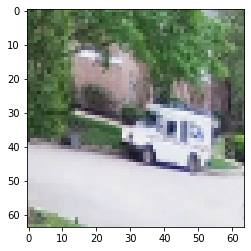

In [61]:
train = cv2.imread('./images_otherview/train/positive/1.jpg')
print(train.shape)
truck = processImg(train, img_size)
print(truck.shape)
print(truck.shape[0]/truck.shape[1])
rgb = cv2.cvtColor(truck, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [62]:
train_pro_pos = processFolder(train_dir_pos, img_size, train_pos_process)
train_pro_neg = processFolder(train_dir_neg, img_size, train_neg_process)
# valid_pro_pos = processFolder(valid_dir_pos, img_size, valid_pos_process)
# valid_pro_neg = processFolder(valid_dir_neg, img_size, valid_neg_process)
test_pro_pos = processFolder(test_dir_pos, img_size, test_pos_process)
test_pro_neg = processFolder(test_dir_neg, img_size, test_neg_process)

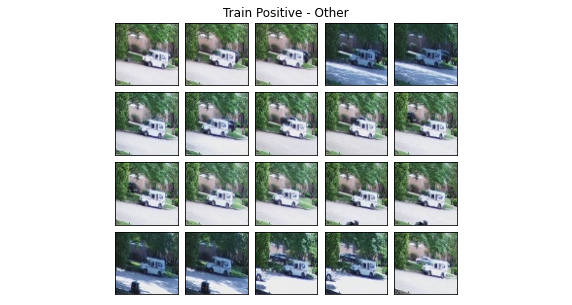

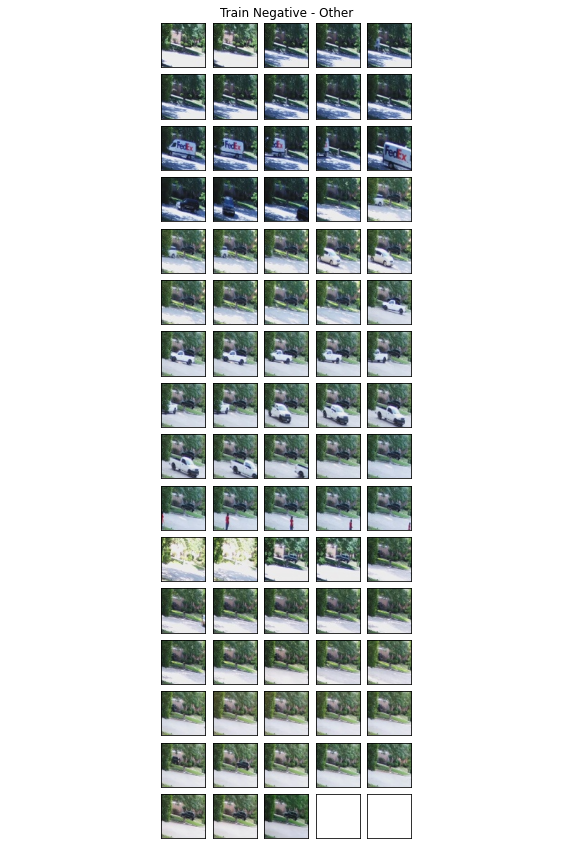

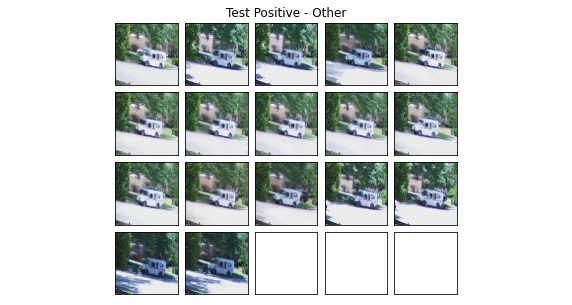

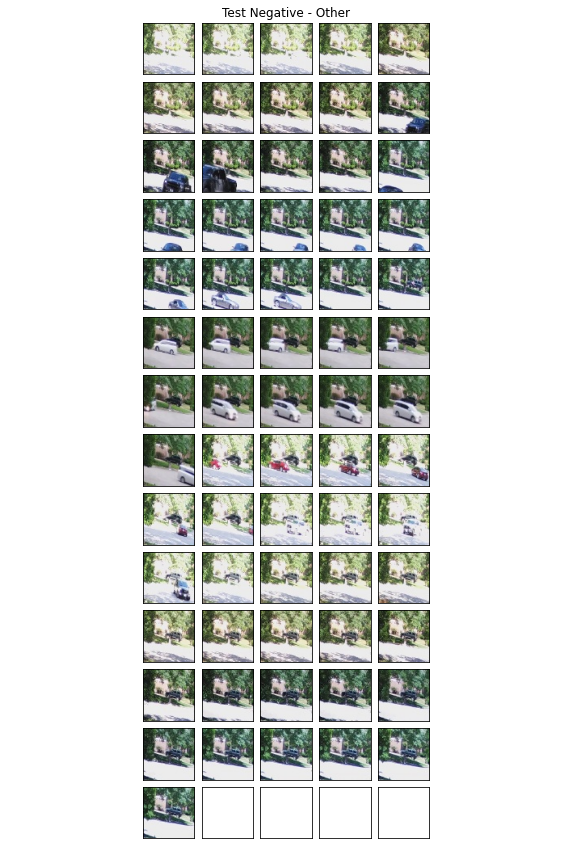

In [82]:
train_pos_grid = displayImageGrid(num_pos_train, 5, train_pro_pos, (10,5), "Train Positive - Other", saveBool=True)
train_neg_grid = displayImageGrid(num_neg_train, 5, train_pro_neg, (10,15), "Train Negative - Other", saveBool=True)
# valid_pos_grid = displayImageGrid(num_pos_valid, 5, valid_pro_pos, (10,20), "Valid Positive", saveBool=False)
# valid_neg_grid = displayImageGrid(num_neg_valid, 5, valid_pro_neg, (10,20), "Valid Negative", saveBool=False)
test_pos_grid = displayImageGrid(num_pos_test, 5, test_pro_pos, (10,5), "Test Positive - Other", saveBool=True)
test_neg_grid = displayImageGrid(num_neg_test, 5, test_pro_neg, (10,15), "Test Negative - Other", saveBool=True)

In [64]:
img_generator = ImageDataGenerator(rescale=1/255.0, rotation_range = 0)

In [65]:
train_img_gen = img_generator.flow_from_directory(batch_size = batch_size, 
                                                  directory = train_dir_process, 
                                                  shuffle = True, 
                                                  class_mode = 'binary',
                                                  target_size=(img_size,img_size))

# valid_img_gen = img_generator.flow_from_directory(batch_size = batch_size, 
#                                                   directory = valid_dir_process, 
#                                                   shuffle = False, 
#                                                   class_mode = 'binary',
#                                                   target_size=(img_size,img_size))

test_img_gen = img_generator.flow_from_directory(batch_size = batch_size, 
                                                  directory = test_dir_process, 
                                                  shuffle = False, 
                                                  class_mode = 'binary',
                                                  target_size=(img_size,img_size))

Found 98 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


(<AxesSubplot:title={'center':'test'}>,
 Text(0.5, 1.0, 'test'),
 ([], []),
 ([], []))

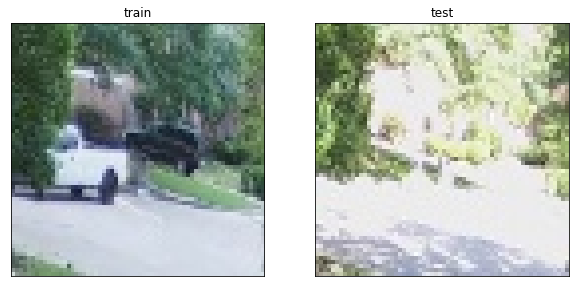

In [66]:
train = train_img_gen[0][0][0]
test = test_img_gen[0][0][0]
# valid = valid_img_gen[0][0][0]

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(train), plt.title("train"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(test), plt.title("test"), plt.xticks([]), plt.yticks([])
# plt.figure(figsize=(10,10))
# plt.subplot(121), plt.imshow(valid), plt.title("valid"), plt.xticks([]), plt.yticks([])

In [67]:
#layer 0
inputs = layers.Input(shape=(img_size, img_size, 3))

#layer 1
c1 = layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
c1 = layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu')(c1)
p1 = layers.MaxPool2D((2,2))(c1)
#print("c1: ", c1)
#print("p1: ", p1)

#layer 2
c2 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(p1)
c2 = layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(c2)
p2 = layers.MaxPool2D((2,2))(c2)
#print("c2: ", c2)
#print("p2: ", p2)

#layer 3
c3 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(p2)
c3 = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(c3)
#print("c3: ", c3)

#layer 2
u4 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c3)
#u4 = tf.nn.conv2d_transpose()

#print("u4: ",u4)
u4 = tf.keras.layers.concatenate([u4, c2])
#print("u4: ",u4)
c4 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(u4)
c4 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(c4)
#print("c4: ", c4)
#layer 1
u5 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c4)
#print("u5: ",u5)
u5 = tf.keras.layers.concatenate([u5, c1])

#layer 0
outputs = tf.keras.layers.Conv2D(1, (1,1),  activation='relu', padding='same')(u5)
outputs = tf.keras.layers.Flatten()(outputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(outputs)
#print("out: ", outputs)

# Bind the optimizer and the loss function to the model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 64, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 64, 64, 16)   2320        conv2d_9[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_10[0][0]                  
____________________________________________________________________________________________

In [68]:
epochs = 20
# fit_result = model.fit(train_img_gen, 
#                        steps_per_epoch = int(np.ceil(total_train/float(batch_size))),
#                        epochs = epochs,
#                        validation_data = valid_img_gen,
#                        validation_steps = int(np.ceil(total_valid/float(batch_size))))

fit_result = model.fit(train_img_gen, 
                       steps_per_epoch = int(np.ceil(total_train/float(batch_size))),
                       epochs = epochs)

Epoch 1/20
4/4 [==============================] - 2s 341ms/step - loss: 0.2354 - accuracy: 0.6338
Epoch 2/20
4/4 [==============================] - 1s 308ms/step - loss: 0.1882 - accuracy: 0.7850
Epoch 3/20
4/4 [==============================] - 1s 325ms/step - loss: 0.1842 - accuracy: 0.8142
Epoch 4/20
4/4 [==============================] - 1s 470ms/step - loss: 0.1826 - accuracy: 0.8169
Epoch 5/20
4/4 [==============================] - 1s 313ms/step - loss: 0.1828 - accuracy: 0.8165
Epoch 6/20
4/4 [==============================] - 1s 309ms/step - loss: 0.2146 - accuracy: 0.7830
Epoch 7/20
4/4 [==============================] - 1s 306ms/step - loss: 0.2037 - accuracy: 0.7793
Epoch 8/20
4/4 [==============================] - 1s 398ms/step - loss: 0.1583 - accuracy: 0.8111
Epoch 9/20
4/4 [==============================] - 1s 394ms/step - loss: 0.1996 - accuracy: 0.7287
Epoch 10/20
4/4 [==============================] - 1s 272ms/step - loss: 0.1604 - accuracy: 0.7883
Epoch 11/20
4/4 [==

In [69]:
print(fit_result.history['accuracy'])

[0.6938775777816772, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.795918345451355, 0.8163265585899353, 0.9387755393981934, 0.9081632494926453, 1.0, 1.0, 1.0]


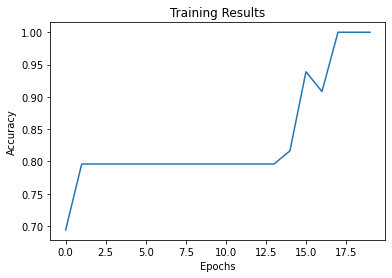

In [94]:
time = range(epochs)
training = plt.plot(time, fit_result.history['accuracy'])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Results")
plt.savefig("./output/figures/TrainingResultsOtherView")
plt.show()

In [71]:
model.save('./output/models/model3.h5')

In [75]:
test_img_gen.reset()

pred = model.predict(test_img_gen, steps=(total_test/batch_size), verbose=1)

predicted_class_indices = np.round(pred)

labels = (train_img_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k[0]] for k in predicted_class_indices]

filenames = test_img_gen.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(len(results))
correct = 0
incorrect = 0
incorrect_location = []
correct_location = []
for index, value in results.iterrows():
    filename = value[0].split('/')[0]
    prediction_value = value[1]
    if (filename == prediction_value):
        correct = correct + 1
        correct_location.append(os.path.join('./images_otherview/test/processed', value[0]))
    else:
        print("file: ", value[0], " prediction: ", prediction_value)
        incorrect_location.append(os.path.join('./images_otherview/test/processed', value[0]))
        incorrect = incorrect + 1

print(correct)
print(incorrect)
print('Accuracy on the test data: ' + str(round((correct/total_test)*100, 1)) + '%')



2/2 [==============================] - 0s 85ms/step
83
file:  positive/17.jpg  prediction:  negative
82
1
Accuracy on the test data: 98.8%


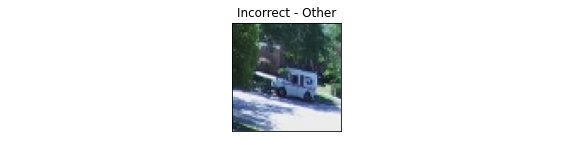

In [84]:
incorrect_graph = displayImageGrid(incorrect,5, incorrect_location, fig_size=(10,2), fig_title = "Incorrect - Other",saveBool=True) #returns none if no incorrect predictions

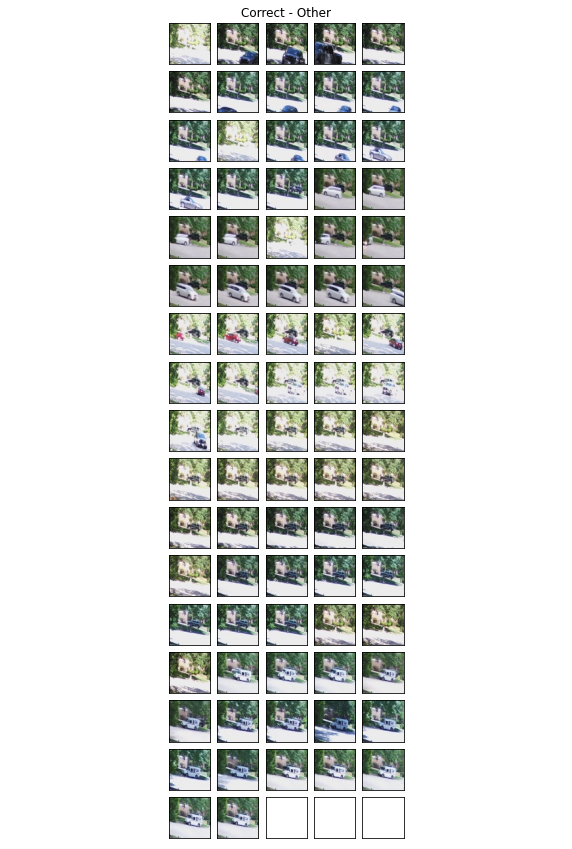

In [85]:
correct_graph = displayImageGrid(correct, 5, correct_location, fig_size=(10,15), fig_title = "Correct - Other",saveBool=True)